# Copyright Netherlands eScience Center <br>
** Function     : Compare AMET and OMET and NEMO ORCA0083 run** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2019.04.06 ** <br>
** Last Update  : 2019.04.06 ** <br>
Description     : The code aims to plot and compare the meridional energy transport
                  in both the atmosphere and ocean. The atmospheric meridional energy
                  transport is calculated from reanalysis data ERA-Interim, MERRA2 and
                  JRA55. The oceanic meridional energy transport is calculated from ORAS4,
                  GLORYS2V3, SODA3 and ORAS5.<br>

Return Value    : NetCFD4 data file<br>
Dependencies    : os, time, numpy, netCDF4, sys, matplotlib, logging<br>
variables       : Atmospheric Meridional Energy Transport   ERA-Interim     MERRA2       JRA55<br>
                  Oceanic Meridional Energy Transport       ORAS4           GLORYS2V3    SODA3<br>
Caveat!!        : Spatial and temporal coverage<br>
                  Atmosphere<br>
                  ERA-Interim   1979 - 2016<br>
                  MERRA2        1980 - 2016<br>
                  JRA55         1979 - 2015<br>
                  Ocean<br>
                  GLORYS2V3     1993 - 2014<br>
                  ORAS4         1958 - 2014<br>
                  SODA3         1980 - 2015<br>
                  NEMO ORCA0083 1979 - 2012<br>
                  The full dataset of ORAS4 is from 1958. However, a quality report from
                  Magdalena from ECMWF indicates the quality of data for the first
                  two decades are very poor. Hence we use the data from 1979. which
                  is the start of satellite era.<br>
                  The full dataset of ORAS4 is from 1958.<br>
                  Data from 20N - 90N are taken into account!<br>

In [1]:
import sys
sys.path.append("/home/ESLT0068/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import numpy as np
import seaborn as sns
#import scipy as sp
import time as tttt
from netCDF4 import Dataset,num2date
import os
import platform
import sys
import logging
import matplotlib
# generate images without having a window appear
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
#from scipy.interpolate import InterpolatedUnivariateSpline
import scipy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import iris
import iris.plot as iplt
import iris.quickplot as qplt

# print the system structure and the path of the kernal
print (platform.architecture())
print (os.path)

('64bit', '')
<module 'posixpath' from '/home/ESLT0068/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/posixpath.py'>


In [2]:
# specify data path
#datapath_ERAI = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/ERAI/postprocessing'
datapath_ERAI = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/warehouse_met/SphericalHarmonics'
datapath_MERRA2 = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/MERRA2/postprocessing'
#datapath_JRA55 = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/JRA55/postprocessing'
datapath_JRA55 = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/warehouse_met/SphericalHarmonics'

datapath_ORAS4 = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/ORAS4/postprocessing'
datapath_GLORYS2V3 = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/GLORYS2V3/postprocessing'
datapath_SODA3 = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/SODA3/postprocessing'
datapath_NEMO = '/home/ESLT0068/WorkFlow/Core_Database_AMET_OMET_reanalysis/ORCA012_BenMoat/postprocessing'
# specify output path for the netCDF4 file
#output_path = '/home/ESLT0068/NLeSC/PhD/Paperwork/Article/AMET_OMET/ESD/figures'
output_path = '/home/ESLT0068/NLeSC/PhD/Paperwork/Article/AMET_OMET/ESD/figures/review'

In [4]:
# There is a cut to JRA, too
# index of latitude for insteret
# 20N
lat_ERAI_20 = 156
lat_MERRA2_20 = 0
lat_JRA55_20 = 195

lat_ORAS4_20 = 181
lat_GLORYS2V3_20 = 579
lat_SODA3_20 = 569
lat_NEMO_20 = 245
# after a cut to 20-90 N
lat_ORAS4_20_cut = 1
lat_GLORYS2V3_20_cut = 0
lat_SODA3_20_cut = 0
lat_NEMO_20_cut = 0

# 30N
lat_ERAI_30 = 80
lat_MERRA2_30 = 20
lat_JRA55_30 = 106

lat_ORAS4_30 = 192
lat_GLORYS2V3_30 = 623
lat_SODA3_30 = 613
lat_NEMO_30 = 377
# after a cut to 20-90 N
lat_ORAS4_30_cut = 12
lat_GLORYS2V3_30_cut = 44
lat_SODA3_30_cut = 44
lat_NEMO_30_cut = 132

# 40N
lat_ERAI_40 = 67
lat_MERRA2_40 = 40
lat_JRA55_40 = 88

lat_ORAS4_40 = 204
lat_GLORYS2V3_40 = 672
lat_SODA3_40 = 662
lat_NEMO_40 = 522
# after a cut to 20-90 N
lat_ORAS4_40_cut = 24
lat_GLORYS2V3_40_cut = 93
lat_SODA3_40_cut = 93
lat_NEMO_40_cut = 277

# 50N
lat_ERAI_50 = 53
lat_MERRA2_50 = 60
lat_JRA55_50 = 70

lat_ORAS4_50 = 218
lat_GLORYS2V3_50 = 726
lat_SODA3_50 = 719
lat_NEMO_50 = 685
# after a cut to 20-90 N
lat_ORAS4_50_cut = 38
lat_GLORYS2V3_50_cut = 147
lat_SODA3_50_cut = 150
lat_NEMO_50_cut = 440

# 60N
lat_ERAI_60 = 213
lat_MERRA2_60 = 80
lat_JRA55_60 = 267

lat_ORAS4_60 = 233
lat_GLORYS2V3_60 = 788
lat_SODA3_60 = 789
lat_NEMO_60 = 871
# after a cut to 20-90 N
lat_ORAS4_60_cut = 53
lat_GLORYS2V3_60_cut = 209
lat_SODA3_60_cut = 220
lat_NEMO_60_cut = 626

# 70N
lat_ERAI_70 = 27
lat_MERRA2_70 = 100
lat_JRA55_70 = 35

lat_ORAS4_70 = 250
lat_GLORYS2V3_70 = 857
lat_SODA3_70 = 880
lat_NEMO_70 = 1078
# after a cut to 20-90 N
lat_ORAS4_70_cut = 70
lat_GLORYS2V3_70_cut = 278
lat_SODA3_70_cut = 311
lat_NEMO_70_cut = 833

# 80N
lat_ERAI_80 = 13
lat_MERRA2_80 = 120
lat_JRA55_80 = 17

lat_ORAS4_80 = 269
lat_GLORYS2V3_80 = 932
lat_SODA3_80 = 974
lat_NEMO_80 = 1303
# after a cut to 20-90 N
lat_ORAS4_80_cut = 89
lat_GLORYS2V3_80_cut = 353
lat_SODA3_80_cut = 405
lat_NEMO_80_cut = 1058

# make a dictionary for instereted sections (for process automation)
lat_interest = {}
lat_interest_list = [20,30,40,50,60,70,80]
lat_interest['ERAI'] = [lat_ERAI_20,lat_ERAI_30,lat_ERAI_40,lat_ERAI_50,lat_ERAI_60,lat_ERAI_70,lat_ERAI_80]
lat_interest['MERRA2'] = [lat_MERRA2_20,lat_MERRA2_30,lat_MERRA2_40,lat_MERRA2_50,lat_MERRA2_60,lat_MERRA2_70,lat_MERRA2_80]
lat_interest['JRA55'] = [lat_JRA55_20,lat_JRA55_30,lat_JRA55_40,lat_JRA55_50,lat_JRA55_60,lat_JRA55_70,lat_JRA55_80]
# after cut
lat_interest['ORAS4'] = [lat_ORAS4_20_cut,lat_ORAS4_30_cut,lat_ORAS4_40_cut,lat_ORAS4_50_cut,lat_ORAS4_60_cut,lat_ORAS4_70_cut,lat_ORAS4_80_cut]
lat_interest['GLORYS2V3'] = [lat_GLORYS2V3_20_cut,lat_GLORYS2V3_30_cut,lat_GLORYS2V3_40_cut,lat_GLORYS2V3_50_cut,lat_GLORYS2V3_60_cut,lat_GLORYS2V3_70_cut,lat_GLORYS2V3_80_cut]
lat_interest['SODA3'] = [lat_SODA3_20_cut,lat_SODA3_30_cut,lat_SODA3_40_cut,lat_SODA3_50_cut,lat_SODA3_60_cut,lat_SODA3_70_cut,lat_SODA3_80_cut]
lat_interest['NEMO'] = [lat_NEMO_20_cut,lat_NEMO_30_cut,lat_NEMO_40_cut,lat_NEMO_50_cut,lat_NEMO_60_cut,lat_NEMO_70_cut,lat_NEMO_80_cut]

In [6]:
#dataset_ERAI = Dataset(datapath_ERAI + os.sep + 'model_daily_075_1979_2016_E_zonal_int.nc')
dataset_ERAI = Dataset(datapath_ERAI + os.sep + 'era_model_subdaily_1979_2017_amet_SH.nc')
dataset_MERRA2 = Dataset(datapath_MERRA2 + os.sep + 'AMET_MERRA2_model_daily_1980_2016_E_zonal_int.nc')
#dataset_JRA55 = Dataset(datapath_JRA55 + os.sep + 'AMET_JRA55_model_daily_1979_2015_E_zonal_int.nc')
dataset_JRA55 = Dataset(datapath_JRA55 + os.sep + 'jra_model_subdaily_1979_2016_amet_SH.nc')

dataset_GLORYS2V3 = Dataset(datapath_GLORYS2V3 + os.sep + 'GLORYS2V3_model_monthly_orca025_E_zonal_int.nc')
dataset_ORAS4 = Dataset(datapath_ORAS4 + os.sep + 'oras4_model_monthly_orca1_E_zonal_int.nc')
dataset_SODA3 = Dataset(datapath_SODA3 + os.sep + 'OMET_SODA3_model_5daily_1980_2015_E_zonal_int.nc')
dataset_NEMO =Dataset(datapath_NEMO + os.sep + 'OMET_NEMO_ORCA0083_daily_1979_2012_E_zonal_int.nc')
#dataset_AMET_point = Dataset(datapath_AMET + os.sep + 'model_daily_075_1979_2016_E_point.nc')
#dataset_OMET_point = Dataset(datapath_OMET + os.sep + 'oras4_model_monthly_orca1_1958_2014_E_point.nc')

# from 1979 to 2014
# from 20N - 90N
AMET_ERAI = dataset_ERAI.variables['E_int'][:,:,156:]/1000 # from Tera Watt to Peta Watt
AMET_MERRA2 = dataset_MERRA2.variables['E'][:]/1000 # from Tera Watt to Peta Watt
AMET_JRA55 = dataset_JRA55.variables['E_int'][:,:,195:]/1000 # from Tera Watt to Peta Watt

OMET_ORAS4 = dataset_ORAS4.variables['E'][21:,:,180:]/1000 # start from 1979
OMET_GLORYS2V3 = dataset_GLORYS2V3.variables['E'][:,:,579:]/1000 # start from 1993
OMET_SODA3 = dataset_SODA3.variables['E'][:,:,569:]/1000 # start from 1980
OMET_NEMO = dataset_NEMO.variables['E'][:,:,245:]/1000 # start from 1979

year_ERAI = dataset_ERAI.variables['year'][:]             # from 1979 to 2014
year_MERRA2 = dataset_MERRA2.variables['year'][:]         # from 1980 to 2014
year_JRA55 = dataset_JRA55.variables['year'][:]           # from 1979 to 2015

year_ORAS4 = dataset_ORAS4.variables['year'][21:]         # from 1979 to 2014
year_GLORYS2V3 = dataset_GLORYS2V3.variables['year'][:]   # from 1993 to 2014
year_SODA3 = dataset_SODA3.variables['year'][:]           # from 1980 to 2014
year_NEMO = dataset_NEMO.variables['year'][:]           # from 1980 to 2014

latitude_ERAI = dataset_ERAI.variables['latitude'][156:]
latitude_MERRA2 = dataset_MERRA2.variables['latitude'][:]
latitude_JRA55 = dataset_JRA55.variables['latitude'][195:]

latitude_ORAS4 = dataset_ORAS4.variables['latitude_aux'][180:]
latitude_GLORYS2V3 = dataset_GLORYS2V3.variables['latitude_aux'][579:]
latitude_SODA3 = dataset_SODA3.variables['latitude_aux'][569:]
latitude_NEMO = dataset_NEMO.variables['latitude_aux'][245:]

In [19]:
print(latitude_ERAI[156:])
print(latitude_JRA55[195:])

[19.99996  20.701714 21.403465 22.105219 22.806973 23.508724 24.210478
 24.91223  25.613983 26.315735 27.017488 27.71924  28.420994 29.122746
 29.8245   30.52625  31.228004 31.929756 32.631508 33.333263 34.035015
 34.736767 35.43852  36.14027  36.842022 37.543777 38.24553  38.94728
 39.649033 40.350784 41.052536 41.754288 42.45604  43.15779  43.859543
 44.561295 45.263046 45.964798 46.66655  47.3683   48.070053 48.771805
 49.473557 50.17531  50.87706  51.57881  52.28056  52.98231  53.684063
 54.385815 55.087563 55.789314 56.491062 57.192814 57.89456  58.596313
 59.29806  59.999813 60.70156  61.40331  62.105057 62.806805 63.508553
 64.210304 64.91205  65.61379  66.315544 67.01729  67.71903  68.42078
 69.12252  69.824265 70.52601  71.22775  71.92949  72.63123  73.33297
 74.034706 74.73644  75.43818  76.13991  76.84164  77.543365 78.245094
 78.94681  79.64853  80.350235 81.05194  81.75363  82.45532  83.15699
 83.858635 84.560265 85.26185  85.96337  86.6648   87.366066 88.06697
 88.76695  

In [7]:
month_ind = np.arange(12)
seansonal_cycle_AMET_ERAI = np.mean(AMET_ERAI,axis=0)
seansonal_cycle_AMET_MERRA2 = np.mean(AMET_MERRA2,axis=0)
seansonal_cycle_AMET_JRA55 = np.mean(AMET_JRA55,axis=0)

seansonal_cycle_OMET_ORAS4 = np.mean(OMET_ORAS4,axis=0)
seansonal_cycle_OMET_GLORYS2V3 = np.mean(OMET_GLORYS2V3,axis=0)
seansonal_cycle_OMET_SODA3 = np.mean(OMET_SODA3,axis=0)
seansonal_cycle_OMET_NEMO = np.mean(OMET_NEMO,axis=0)

AMET_ERAI_white = np.zeros(AMET_ERAI.shape,dtype=float)
AMET_MERRA2_white = np.zeros(AMET_MERRA2.shape,dtype=float)
AMET_JRA55_white = np.zeros(AMET_JRA55.shape,dtype=float)

OMET_ORAS4_white = np.zeros(OMET_ORAS4.shape,dtype=float)
OMET_GLORYS2V3_white = np.zeros(OMET_GLORYS2V3.shape,dtype=float)
OMET_SODA3_white = np.zeros(OMET_SODA3.shape,dtype=float)
OMET_NEMO_white = np.zeros(OMET_NEMO.shape,dtype=float)

for i in np.arange(len(year_ERAI)):
    for j in month_ind:
        AMET_ERAI_white[i,j,:] = AMET_ERAI[i,j,:] - seansonal_cycle_AMET_ERAI[j,:]

for i in np.arange(len(year_MERRA2)):
    for j in month_ind:
        AMET_MERRA2_white[i,j,:] = AMET_MERRA2[i,j,:] - seansonal_cycle_AMET_MERRA2[j,:]

for i in np.arange(len(year_JRA55)):
    for j in month_ind:
        AMET_JRA55_white[i,j,:] = AMET_JRA55[i,j,:] - seansonal_cycle_AMET_JRA55[j,:]

for i in np.arange(len(year_ORAS4)):
    for j in month_ind:
        OMET_ORAS4_white[i,j,:] = OMET_ORAS4[i,j,:] - seansonal_cycle_OMET_ORAS4[j,:]

for i in np.arange(len(year_GLORYS2V3)):
    for j in month_ind:
        OMET_GLORYS2V3_white[i,j,:] = OMET_GLORYS2V3[i,j,:] - seansonal_cycle_OMET_GLORYS2V3[j,:]

for i in np.arange(len(year_SODA3)):
    for j in month_ind:
        OMET_SODA3_white[i,j,:] = OMET_SODA3[i,j,:] - seansonal_cycle_OMET_SODA3[j,:]

for i in np.arange(len(year_NEMO)):
    for j in month_ind:
        OMET_NEMO_white[i,j,:] = OMET_NEMO[i,j,:] - seansonal_cycle_OMET_NEMO[j,:]


In [8]:
# annual mean of AMET and OMET at different latitudes
AMET_ERAI_mean = np.mean(np.mean(AMET_ERAI,0),0)
AMET_MERRA2_mean = np.mean(np.mean(AMET_MERRA2,0),0)
AMET_JRA55_mean = np.mean(np.mean(AMET_JRA55,0),0)

OMET_ORAS4_mean = np.mean(np.mean(OMET_ORAS4,0),0)
OMET_GLORYS2V3_mean = np.mean(np.mean(OMET_GLORYS2V3,0),0)
OMET_SODA3_mean = np.mean(np.mean(OMET_SODA3,0),0)
OMET_NEMO_mean = np.mean(np.mean(OMET_NEMO,0),0)
# dataset with seasonal cycle - time series
AMET_ERAI_series = AMET_ERAI.reshape(len(year_ERAI)*len(month_ind),len(latitude_ERAI))
AMET_MERRA2_series = AMET_MERRA2.reshape(len(year_MERRA2)*len(month_ind),len(latitude_MERRA2))
AMET_JRA55_series = AMET_JRA55.reshape(len(year_JRA55)*len(month_ind),len(latitude_JRA55))

OMET_ORAS4_series = OMET_ORAS4.reshape(len(year_ORAS4)*len(month_ind),len(latitude_ORAS4))
OMET_GLORYS2V3_series = OMET_GLORYS2V3.reshape(len(year_GLORYS2V3)*len(month_ind),len(latitude_GLORYS2V3))
OMET_SODA3_series = OMET_SODA3.reshape(len(year_SODA3)*len(month_ind),len(latitude_SODA3))
OMET_NEMO_series = OMET_NEMO.reshape(len(year_NEMO)*len(month_ind),len(latitude_NEMO))

# dataset without seasonal cycle - time series
AMET_ERAI_white_series = AMET_ERAI_white.reshape(len(year_ERAI)*len(month_ind),len(latitude_ERAI))
AMET_MERRA2_white_series = AMET_MERRA2_white.reshape(len(year_MERRA2)*len(month_ind),len(latitude_MERRA2))
AMET_JRA55_white_series = AMET_JRA55_white.reshape(len(year_JRA55)*len(month_ind),len(latitude_JRA55))

OMET_ORAS4_white_series = OMET_ORAS4_white.reshape(len(year_ORAS4)*len(month_ind),len(latitude_ORAS4))
OMET_GLORYS2V3_white_series = OMET_GLORYS2V3_white.reshape(len(year_GLORYS2V3)*len(month_ind),len(latitude_GLORYS2V3))
OMET_SODA3_white_series = OMET_SODA3_white.reshape(len(year_SODA3)*len(month_ind),len(latitude_SODA3))
OMET_NEMO_white_series = OMET_NEMO_white.reshape(len(year_NEMO)*len(month_ind),len(latitude_NEMO))

In [9]:
# standard deviation at each latitude
# for error bar band
# reshape of each dataset at full latitude for the calculation of standard deviation
AMET_ERAI_std = np.std(AMET_ERAI_series,axis=0)
AMET_ERAI_error_plus = AMET_ERAI_mean + AMET_ERAI_std
AMET_ERAI_error_minus = AMET_ERAI_mean - AMET_ERAI_std

AMET_MERRA2_std = np.std(AMET_MERRA2_series,axis=0)
AMET_MERRA2_error_plus = AMET_MERRA2_mean + AMET_MERRA2_std
AMET_MERRA2_error_minus = AMET_MERRA2_mean - AMET_MERRA2_std

AMET_JRA55_std = np.std(AMET_JRA55_series,axis=0)
AMET_JRA55_error_plus = AMET_JRA55_mean + AMET_JRA55_std
AMET_JRA55_error_minus = AMET_JRA55_mean - AMET_JRA55_std

OMET_ORAS4_std = np.std(OMET_ORAS4_series,axis=0)
OMET_ORAS4_error_plus = OMET_ORAS4_mean + OMET_ORAS4_std
OMET_ORAS4_error_minus = OMET_ORAS4_mean - OMET_ORAS4_std

OMET_GLORYS2V3_std = np.std(OMET_GLORYS2V3_series,axis=0)
OMET_GLORYS2V3_error_plus = OMET_GLORYS2V3_mean + OMET_GLORYS2V3_std
OMET_GLORYS2V3_error_minus = OMET_GLORYS2V3_mean - OMET_GLORYS2V3_std

OMET_SODA3_std = np.std(OMET_SODA3_series,axis=0)
OMET_SODA3_error_plus = OMET_SODA3_mean + OMET_SODA3_std
OMET_SODA3_error_minus = OMET_SODA3_mean - OMET_SODA3_std

OMET_NEMO_std = np.std(OMET_NEMO_series,axis=0)
OMET_NEMO_error_plus = OMET_NEMO_mean + OMET_NEMO_std
OMET_NEMO_error_minus = OMET_NEMO_mean - OMET_NEMO_std

In [10]:
# calculate annual mean
AMET_ERAI_full_annual_mean = np.mean(AMET_ERAI,1)
AMET_MERRA2_full_annual_mean = np.mean(AMET_MERRA2,1)
AMET_JRA55_full_annual_mean = np.mean(AMET_JRA55,1)
OMET_ORAS4_full_annual_mean = np.mean(OMET_ORAS4,1)
OMET_GLORYS2V3_full_annual_mean = np.mean(OMET_GLORYS2V3,1)
OMET_SODA3_full_annual_mean = np.mean(OMET_SODA3,1)
OMET_NEMO_full_annual_mean = np.mean(OMET_NEMO,1)
# calculate the difference between annual mean and mean of entire time series
AMET_ERAI_full_annual_mean_max = np.amax(AMET_ERAI_full_annual_mean,0)
AMET_MERRA2_full_annual_mean_max = np.amax(AMET_MERRA2_full_annual_mean,0)
AMET_JRA55_full_annual_mean_max = np.amax(AMET_JRA55_full_annual_mean,0)
OMET_ORAS4_full_annual_mean_max = np.amax(OMET_ORAS4_full_annual_mean,0)
OMET_GLORYS2V3_full_annual_mean_max = np.amax(OMET_GLORYS2V3_full_annual_mean,0)
OMET_SODA3_full_annual_mean_max = np.amax(OMET_SODA3_full_annual_mean,0)
OMET_NEMO_full_annual_mean_max = np.amax(OMET_NEMO_full_annual_mean,0)

AMET_ERAI_full_annual_mean_min = np.amin(AMET_ERAI_full_annual_mean,0)
AMET_MERRA2_full_annual_mean_min = np.amin(AMET_MERRA2_full_annual_mean,0)
AMET_JRA55_full_annual_mean_min = np.amin(AMET_JRA55_full_annual_mean,0)
OMET_ORAS4_full_annual_mean_min = np.amin(OMET_ORAS4_full_annual_mean,0)
OMET_GLORYS2V3_full_annual_mean_min = np.amin(OMET_GLORYS2V3_full_annual_mean,0)
OMET_SODA3_full_annual_mean_min = np.amin(OMET_SODA3_full_annual_mean,0)
OMET_NEMO_full_annual_mean_min = np.amin(OMET_NEMO_full_annual_mean,0)

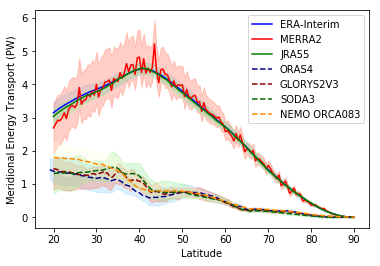

In [11]:
fig00 = plt.figure()
plt.plot(latitude_ERAI,AMET_ERAI_mean,'b-',label='ERA-Interim')
plt.fill_between(latitude_ERAI,AMET_ERAI_full_annual_mean_max,AMET_ERAI_full_annual_mean_min,alpha=0.3,edgecolor='lightskyblue', facecolor='lightskyblue')
plt.plot(latitude_MERRA2,AMET_MERRA2_mean,'r-',label='MERRA2')
plt.fill_between(latitude_MERRA2,AMET_MERRA2_full_annual_mean_max,AMET_MERRA2_full_annual_mean_min,alpha=0.3,edgecolor='tomato', facecolor='tomato')
plt.plot(latitude_JRA55,AMET_JRA55_mean,'g-',label='JRA55')
plt.fill_between(latitude_JRA55,AMET_JRA55_full_annual_mean_max,AMET_JRA55_full_annual_mean_min,alpha=0.3,edgecolor='lightgreen', facecolor='lightgreen')
plt.plot(latitude_ORAS4,OMET_ORAS4_mean,color='darkblue',linestyle='--',label='ORAS4')
plt.fill_between(latitude_ORAS4,OMET_ORAS4_full_annual_mean_max,OMET_ORAS4_full_annual_mean_min,alpha=0.3,edgecolor='lightskyblue', facecolor='lightskyblue')
plt.plot(latitude_GLORYS2V3,OMET_GLORYS2V3_mean,color='darkred',linestyle='--',label='GLORYS2V3')
plt.fill_between(latitude_GLORYS2V3,OMET_GLORYS2V3_full_annual_mean_max,OMET_GLORYS2V3_full_annual_mean_min,alpha=0.3,edgecolor='tomato', facecolor='tomato')
plt.plot(latitude_SODA3,OMET_SODA3_mean,color='darkgreen',linestyle='--',label='SODA3')
plt.fill_between(latitude_SODA3,OMET_SODA3_full_annual_mean_max,OMET_SODA3_full_annual_mean_min,alpha=0.3,edgecolor='lightgreen', facecolor='lightgreen')
plt.plot(latitude_NEMO,OMET_NEMO_mean,color='darkorange',linestyle='--',label='NEMO ORCA083')
plt.fill_between(latitude_NEMO,OMET_NEMO_full_annual_mean_max,OMET_NEMO_full_annual_mean_min,alpha=0.3,edgecolor='lightyellow', facecolor='lightyellow')
#plt.plot(latitude_AMET,AMET_mean + OMET_mean_interpolate,'g--',label='Total')
#plt.title('Mean AMET & OMET of entire time series from 20N to 90N')
plt.legend()
#fig1.set_size_inches(5, 5)
plt.xlabel("Latitude")
labels =['20','30','40','50','60','70','80','90']
plt.xticks(np.linspace(20, 90, 8),labels)
#plt.xticks(rotation=60)
plt.ylabel("Meridional Energy Transport (PW)")
plt.show()
fig00.savefig(output_path + os.sep + 'AMET_OMET_NEMO_annual_mean_span.png', dpi = 300)